- n = [2000, 4000]

- indp = N
- z_dis = gaussian
- noise_dis = t
- dz=2,3,5,10
- alpha=1.75

In [7]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

In [10]:
n_list = [2000, 4000]
ensembles = [(p_alpha175, 1), (p_alpha175, 1000)]
t = 100
cit = ccit

Default (k=1)


n=4000: 100%|██████████| 100/100 [42:33<00:00, 25.53s/it]


Ensemble (k=1000, p_alpha175)


n=4000: 100%|██████████| 100/100 [1:59:24<00:00, 71.64s/it] 


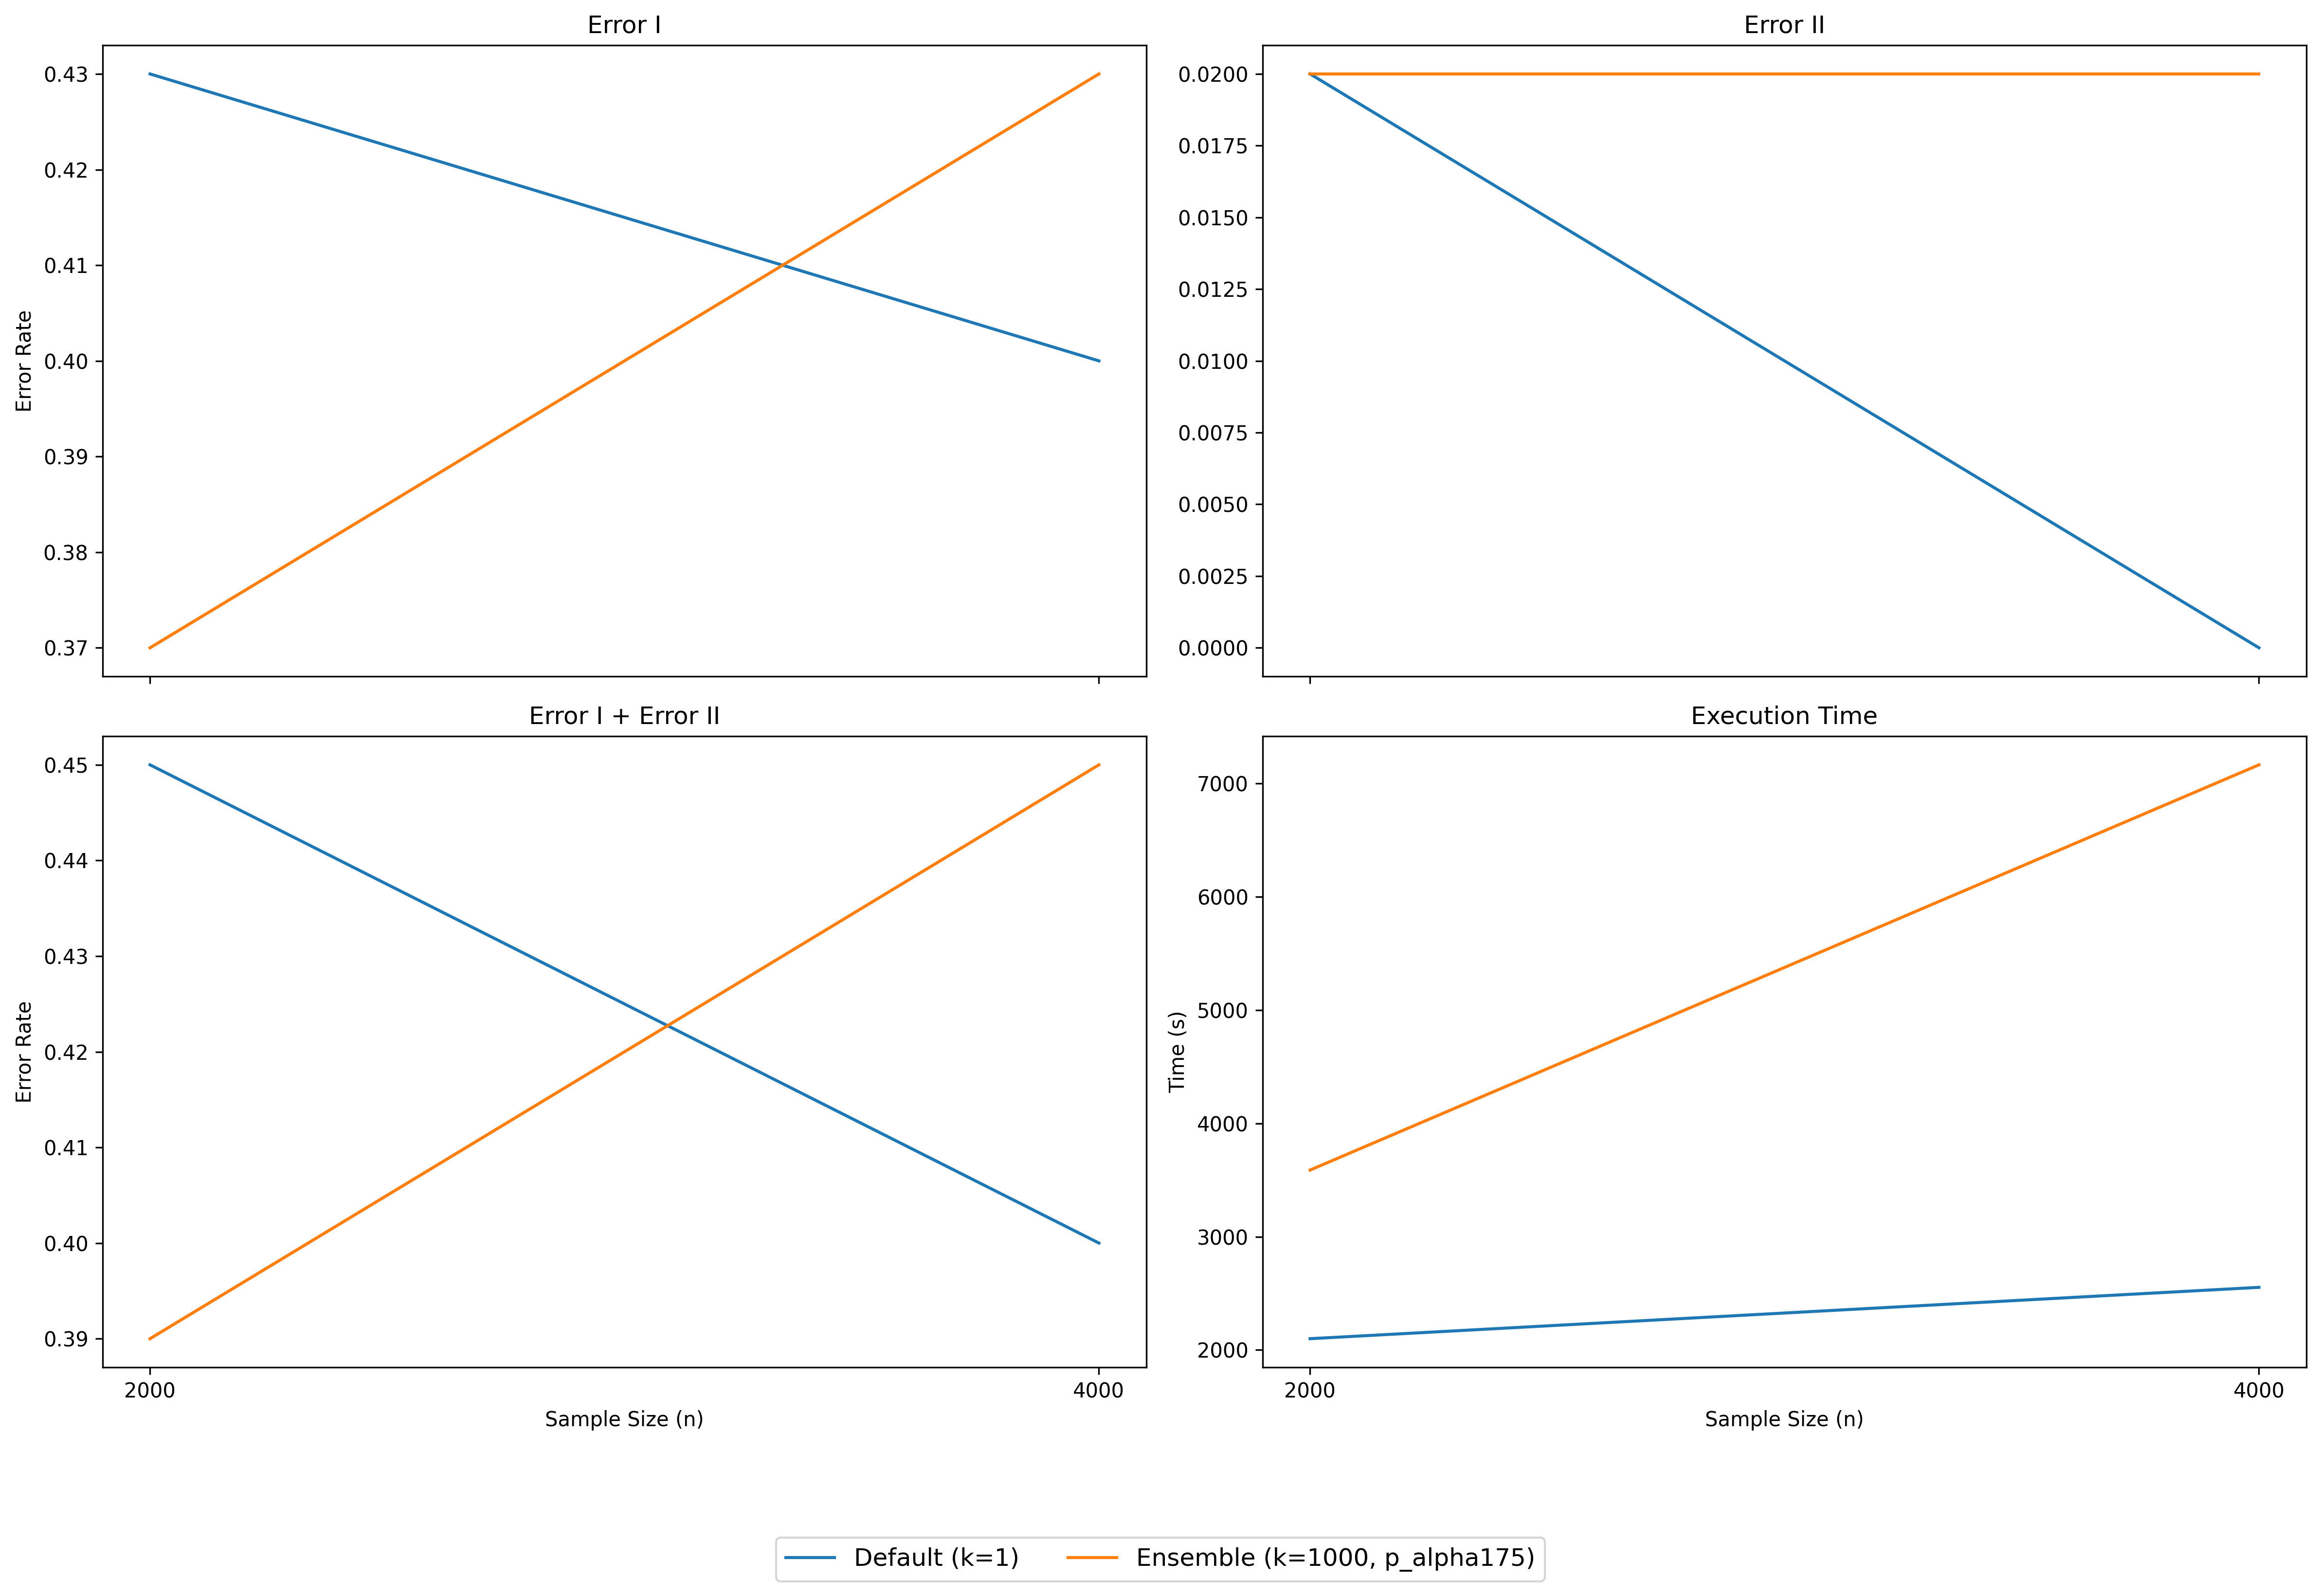

[[[0.43, 0.4], [0.02, 0.0], [2100.0173330307007, 2553.1212046146393]],
 [[0.37, 0.43], [0.02, 0.02], [3588.1502780914307, 7164.238479614258]]]

In [11]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 100/100 [48:30<00:00, 29.10s/it]


Ensemble (k=1000, p_alpha175)


n=4000: 100%|██████████| 100/100 [2:07:29<00:00, 76.49s/it] 


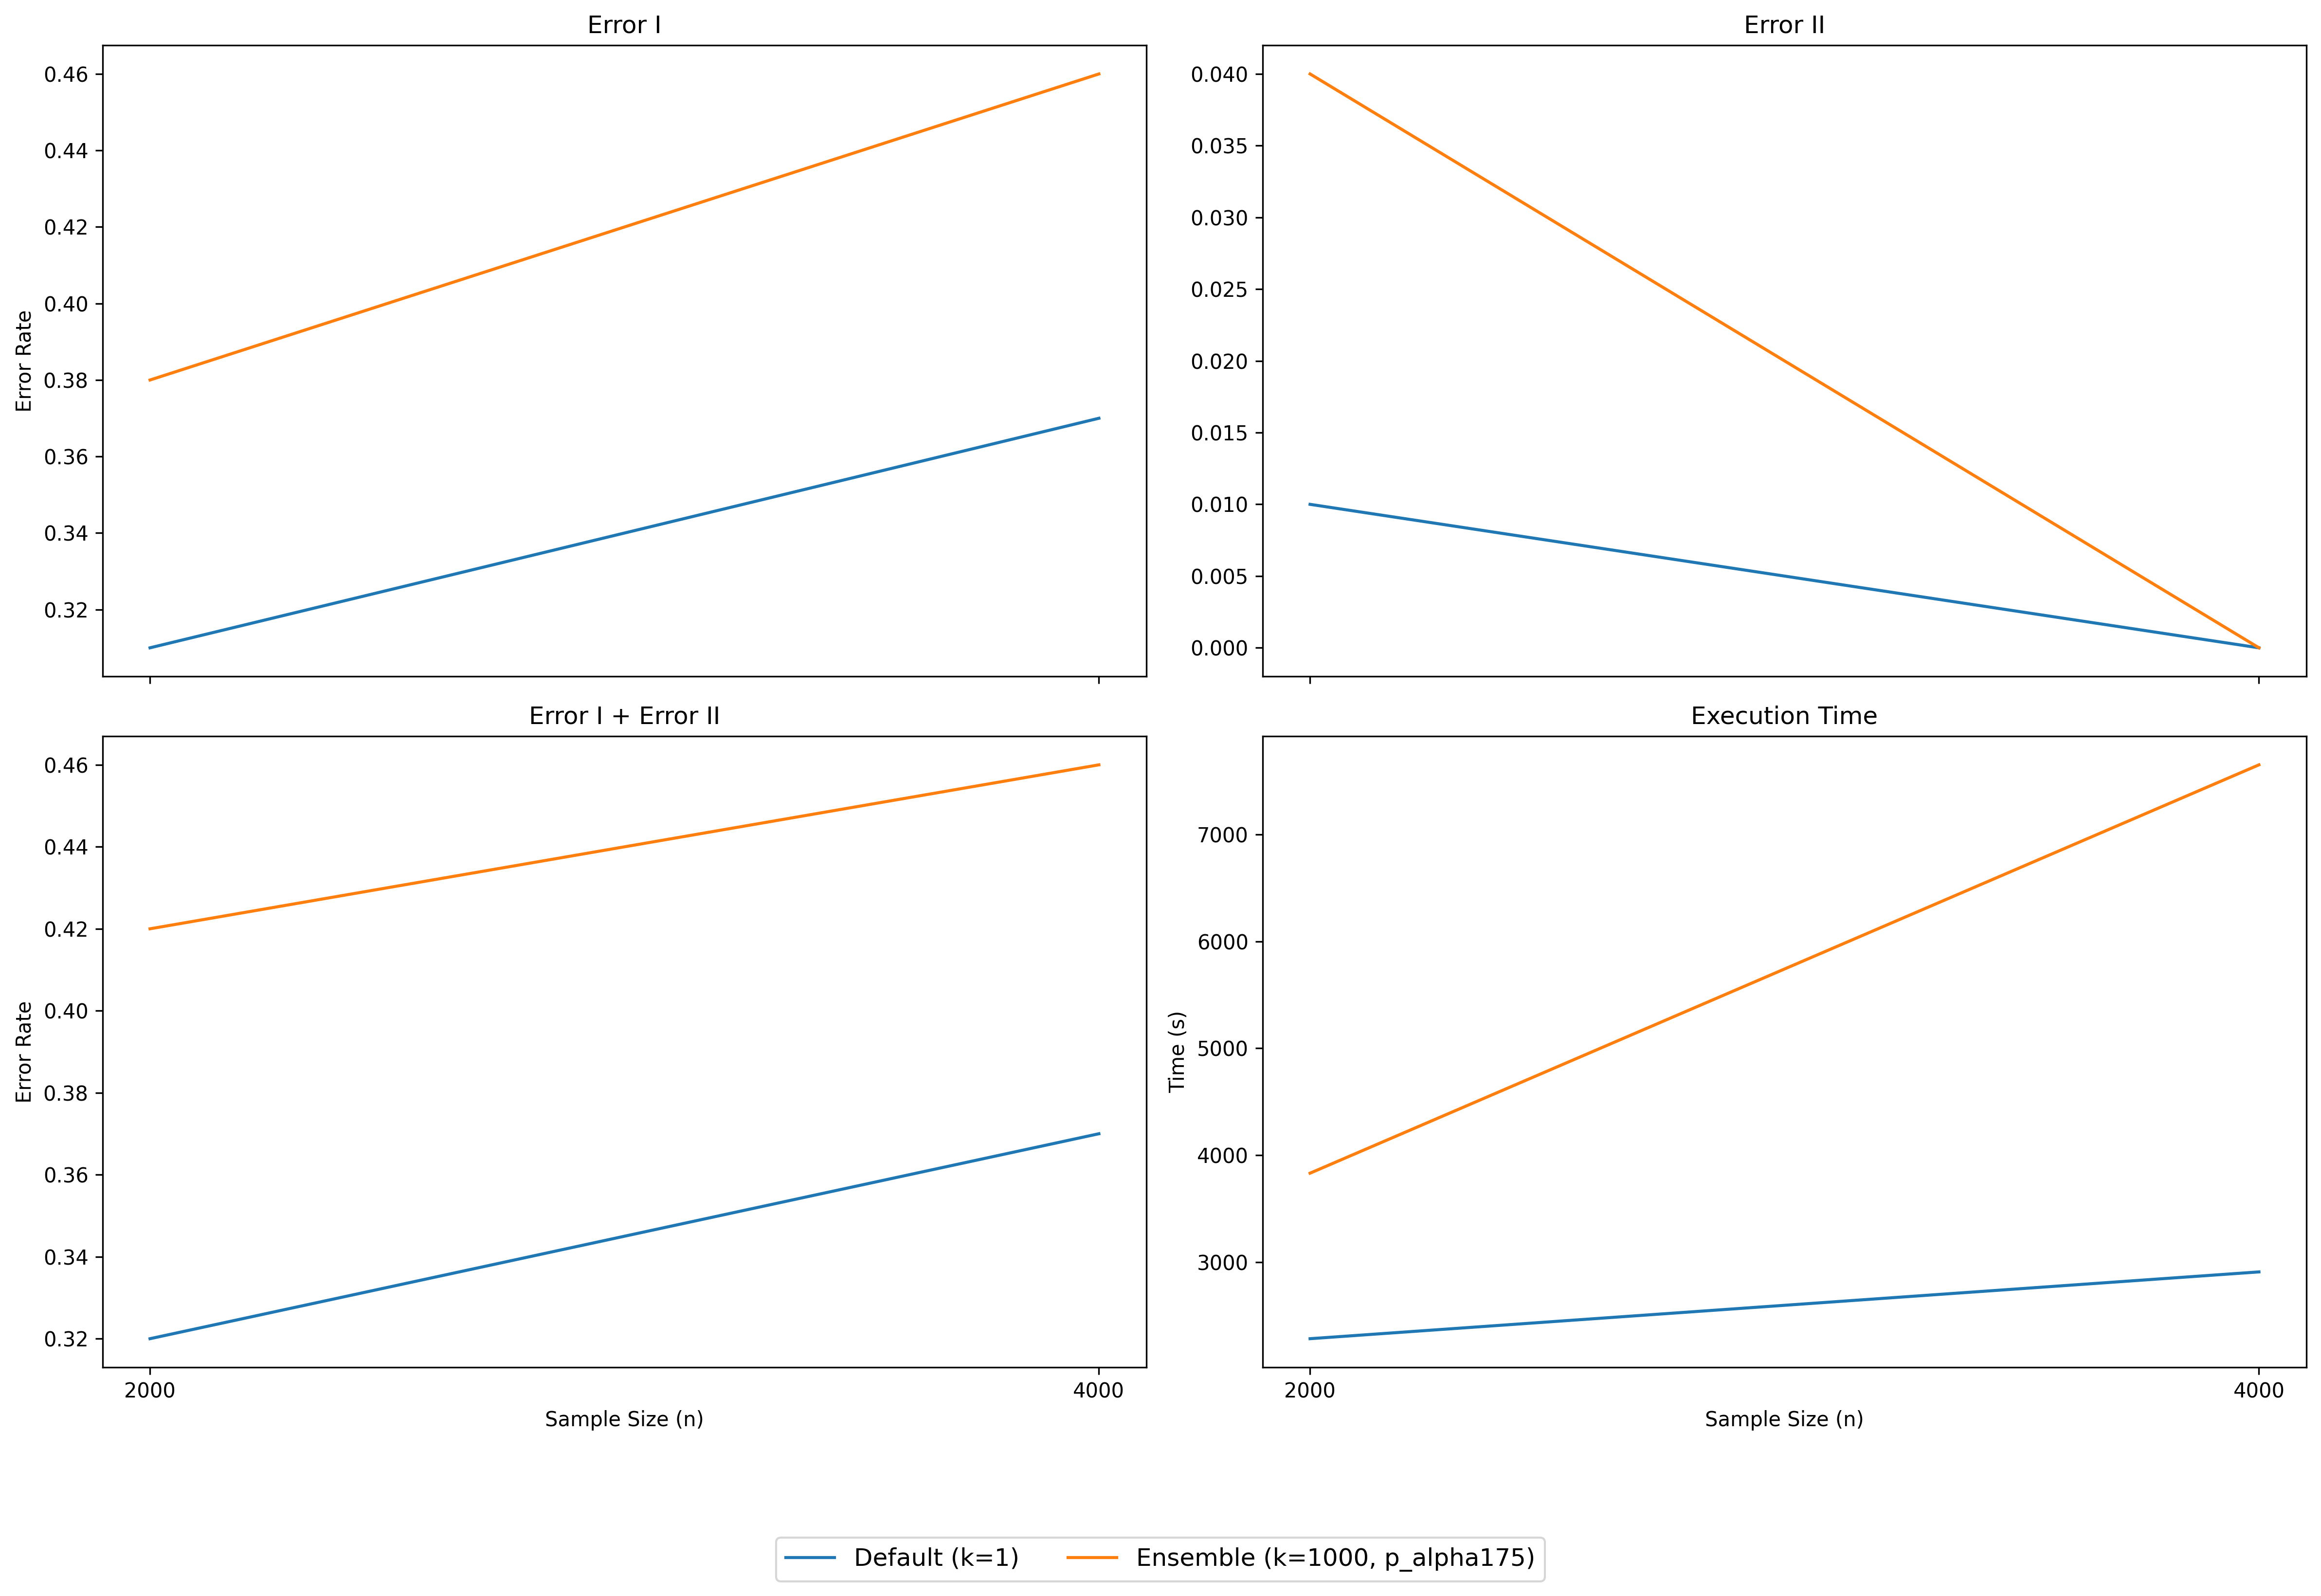

[[[0.31, 0.37], [0.01, 0.0], [2286.0553364753723, 2910.279447078705]],
 [[0.38, 0.46], [0.04, 0.0], [3833.048258781433, 7649.452710866928]]]

In [14]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=3,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 100/100 [57:51<00:00, 34.72s/it]


Ensemble (k=1000, p_alpha175)


n=4000: 100%|██████████| 100/100 [2:27:39<00:00, 88.60s/it] 


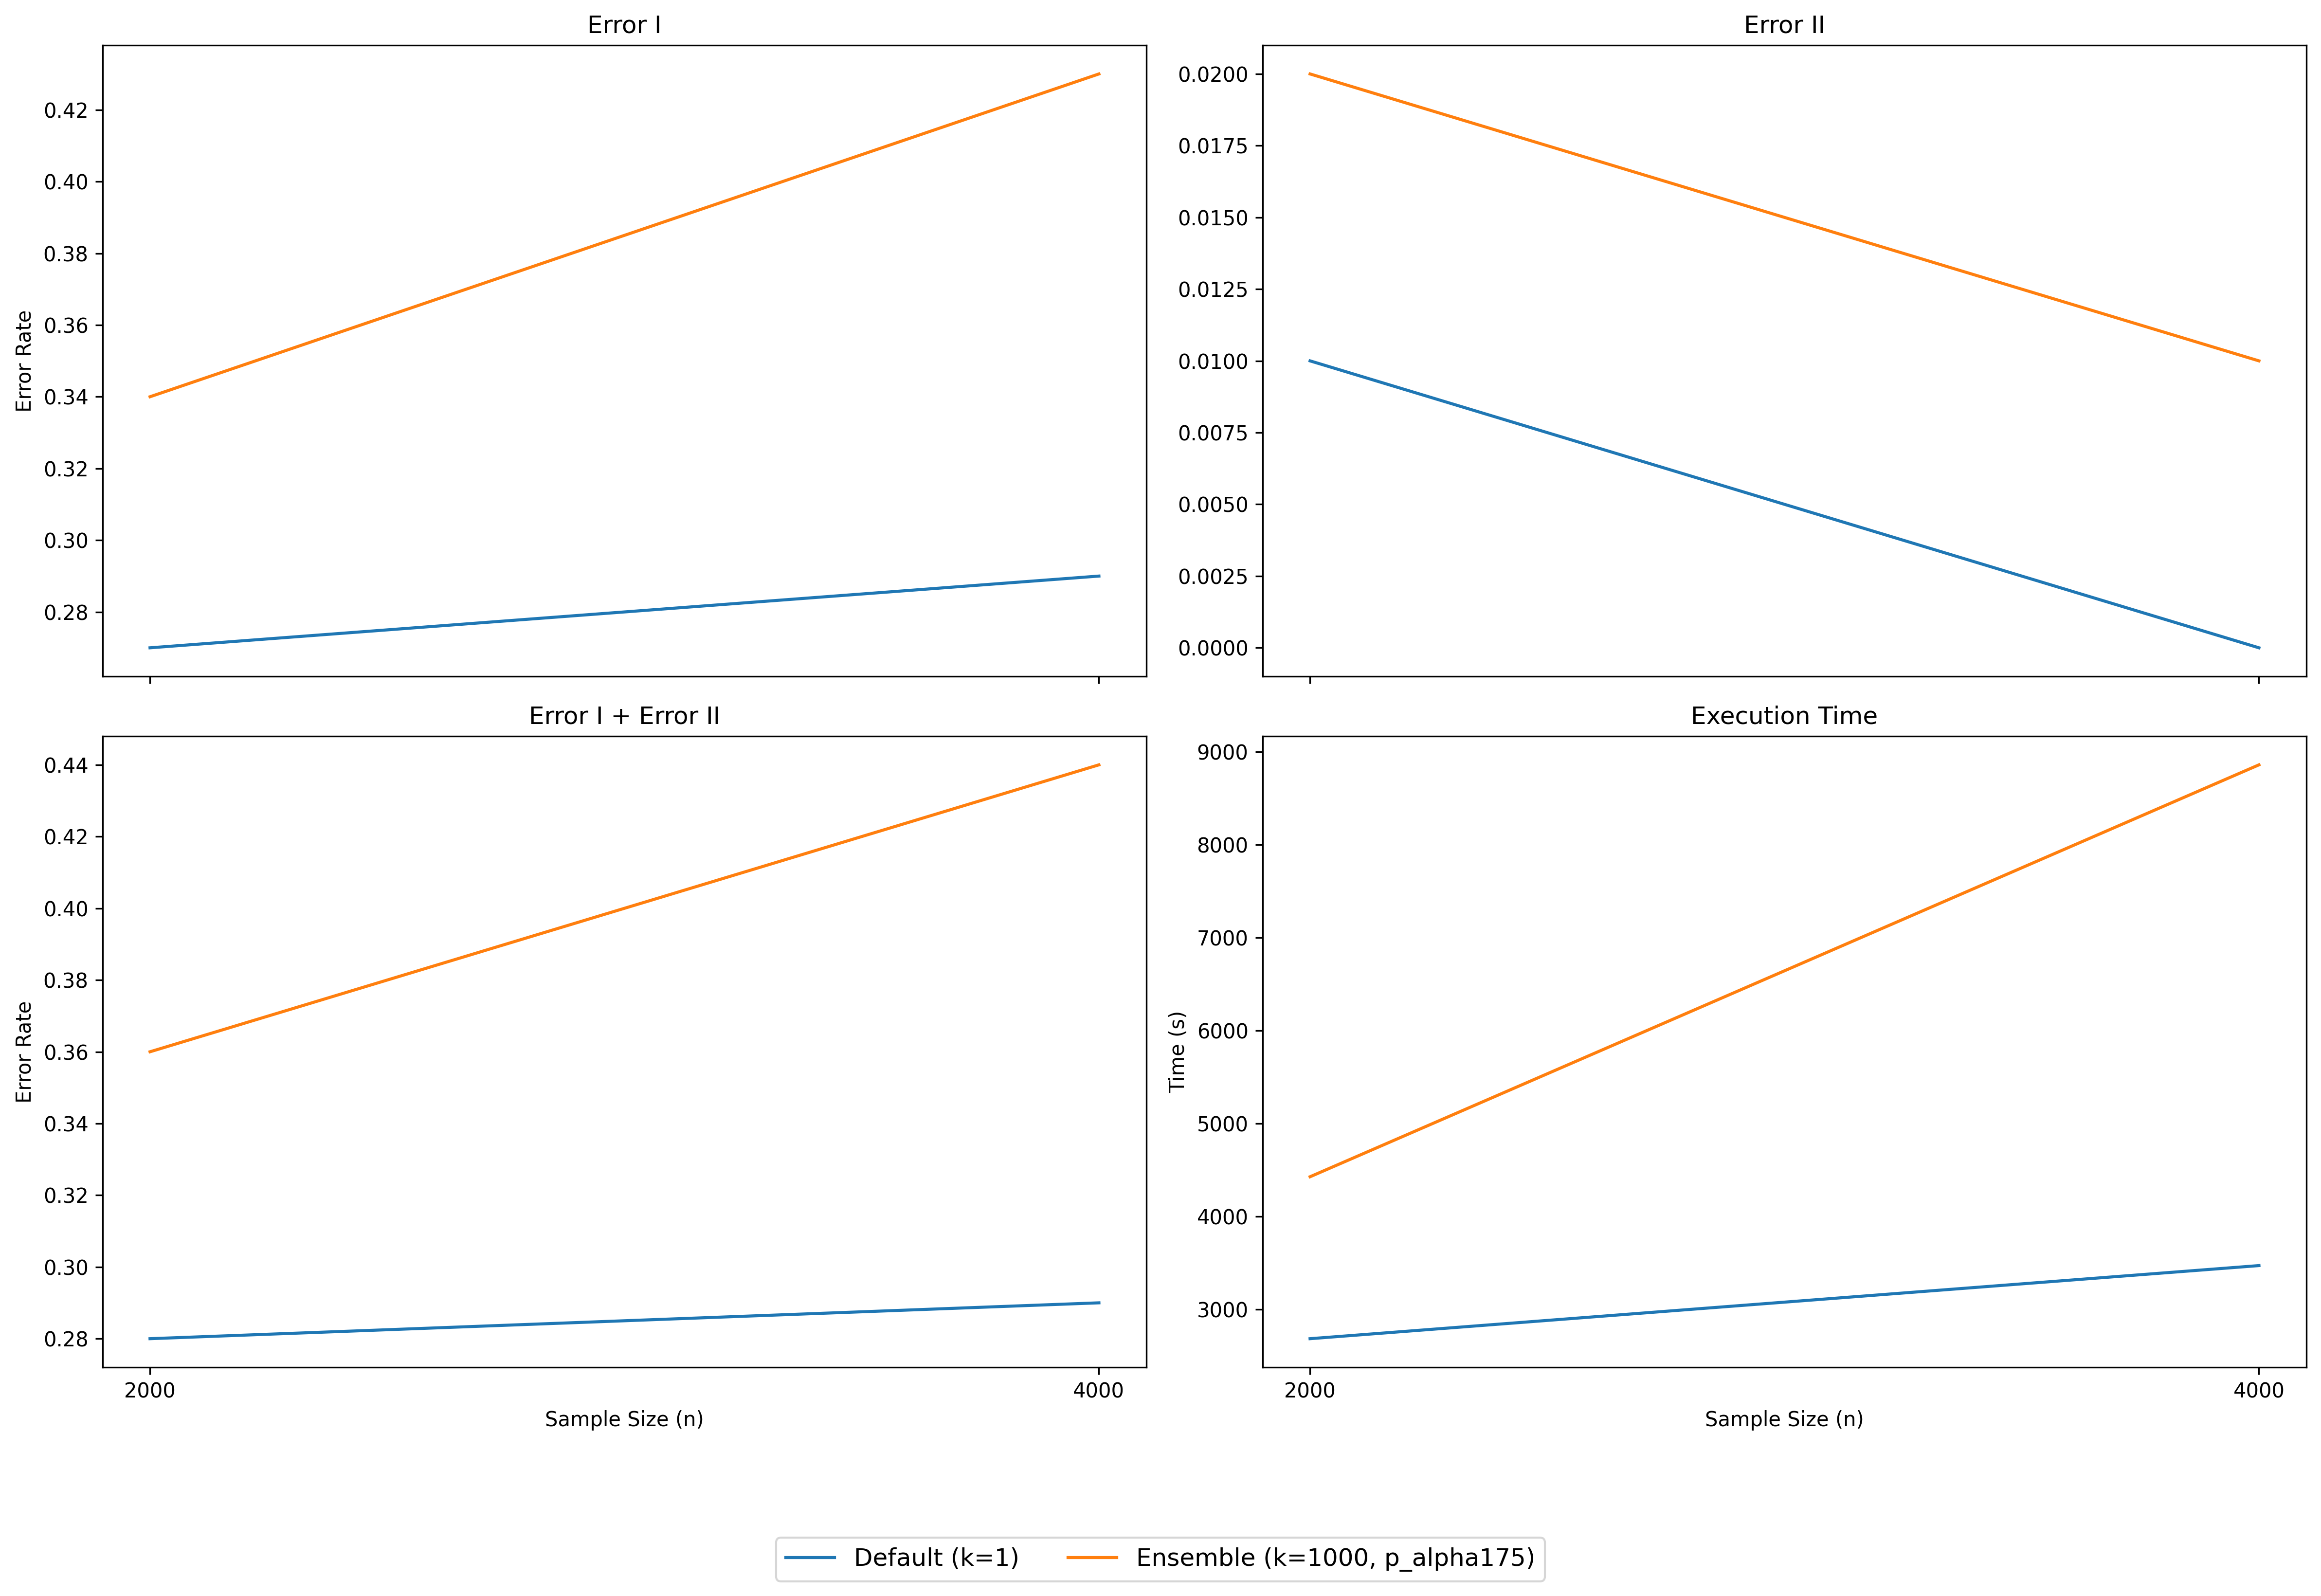

[[[0.27, 0.29], [0.01, 0.0], [2684.8744025230408, 3471.5177567005157]],
 [[0.34, 0.43], [0.02, 0.01], [4427.572470664978, 8859.977202653885]]]

In [12]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 100/100 [1:29:03<00:00, 53.43s/it]


Ensemble (k=1000, p_alpha175)


n=4000: 100%|██████████| 100/100 [3:34:01<00:00, 128.41s/it] 


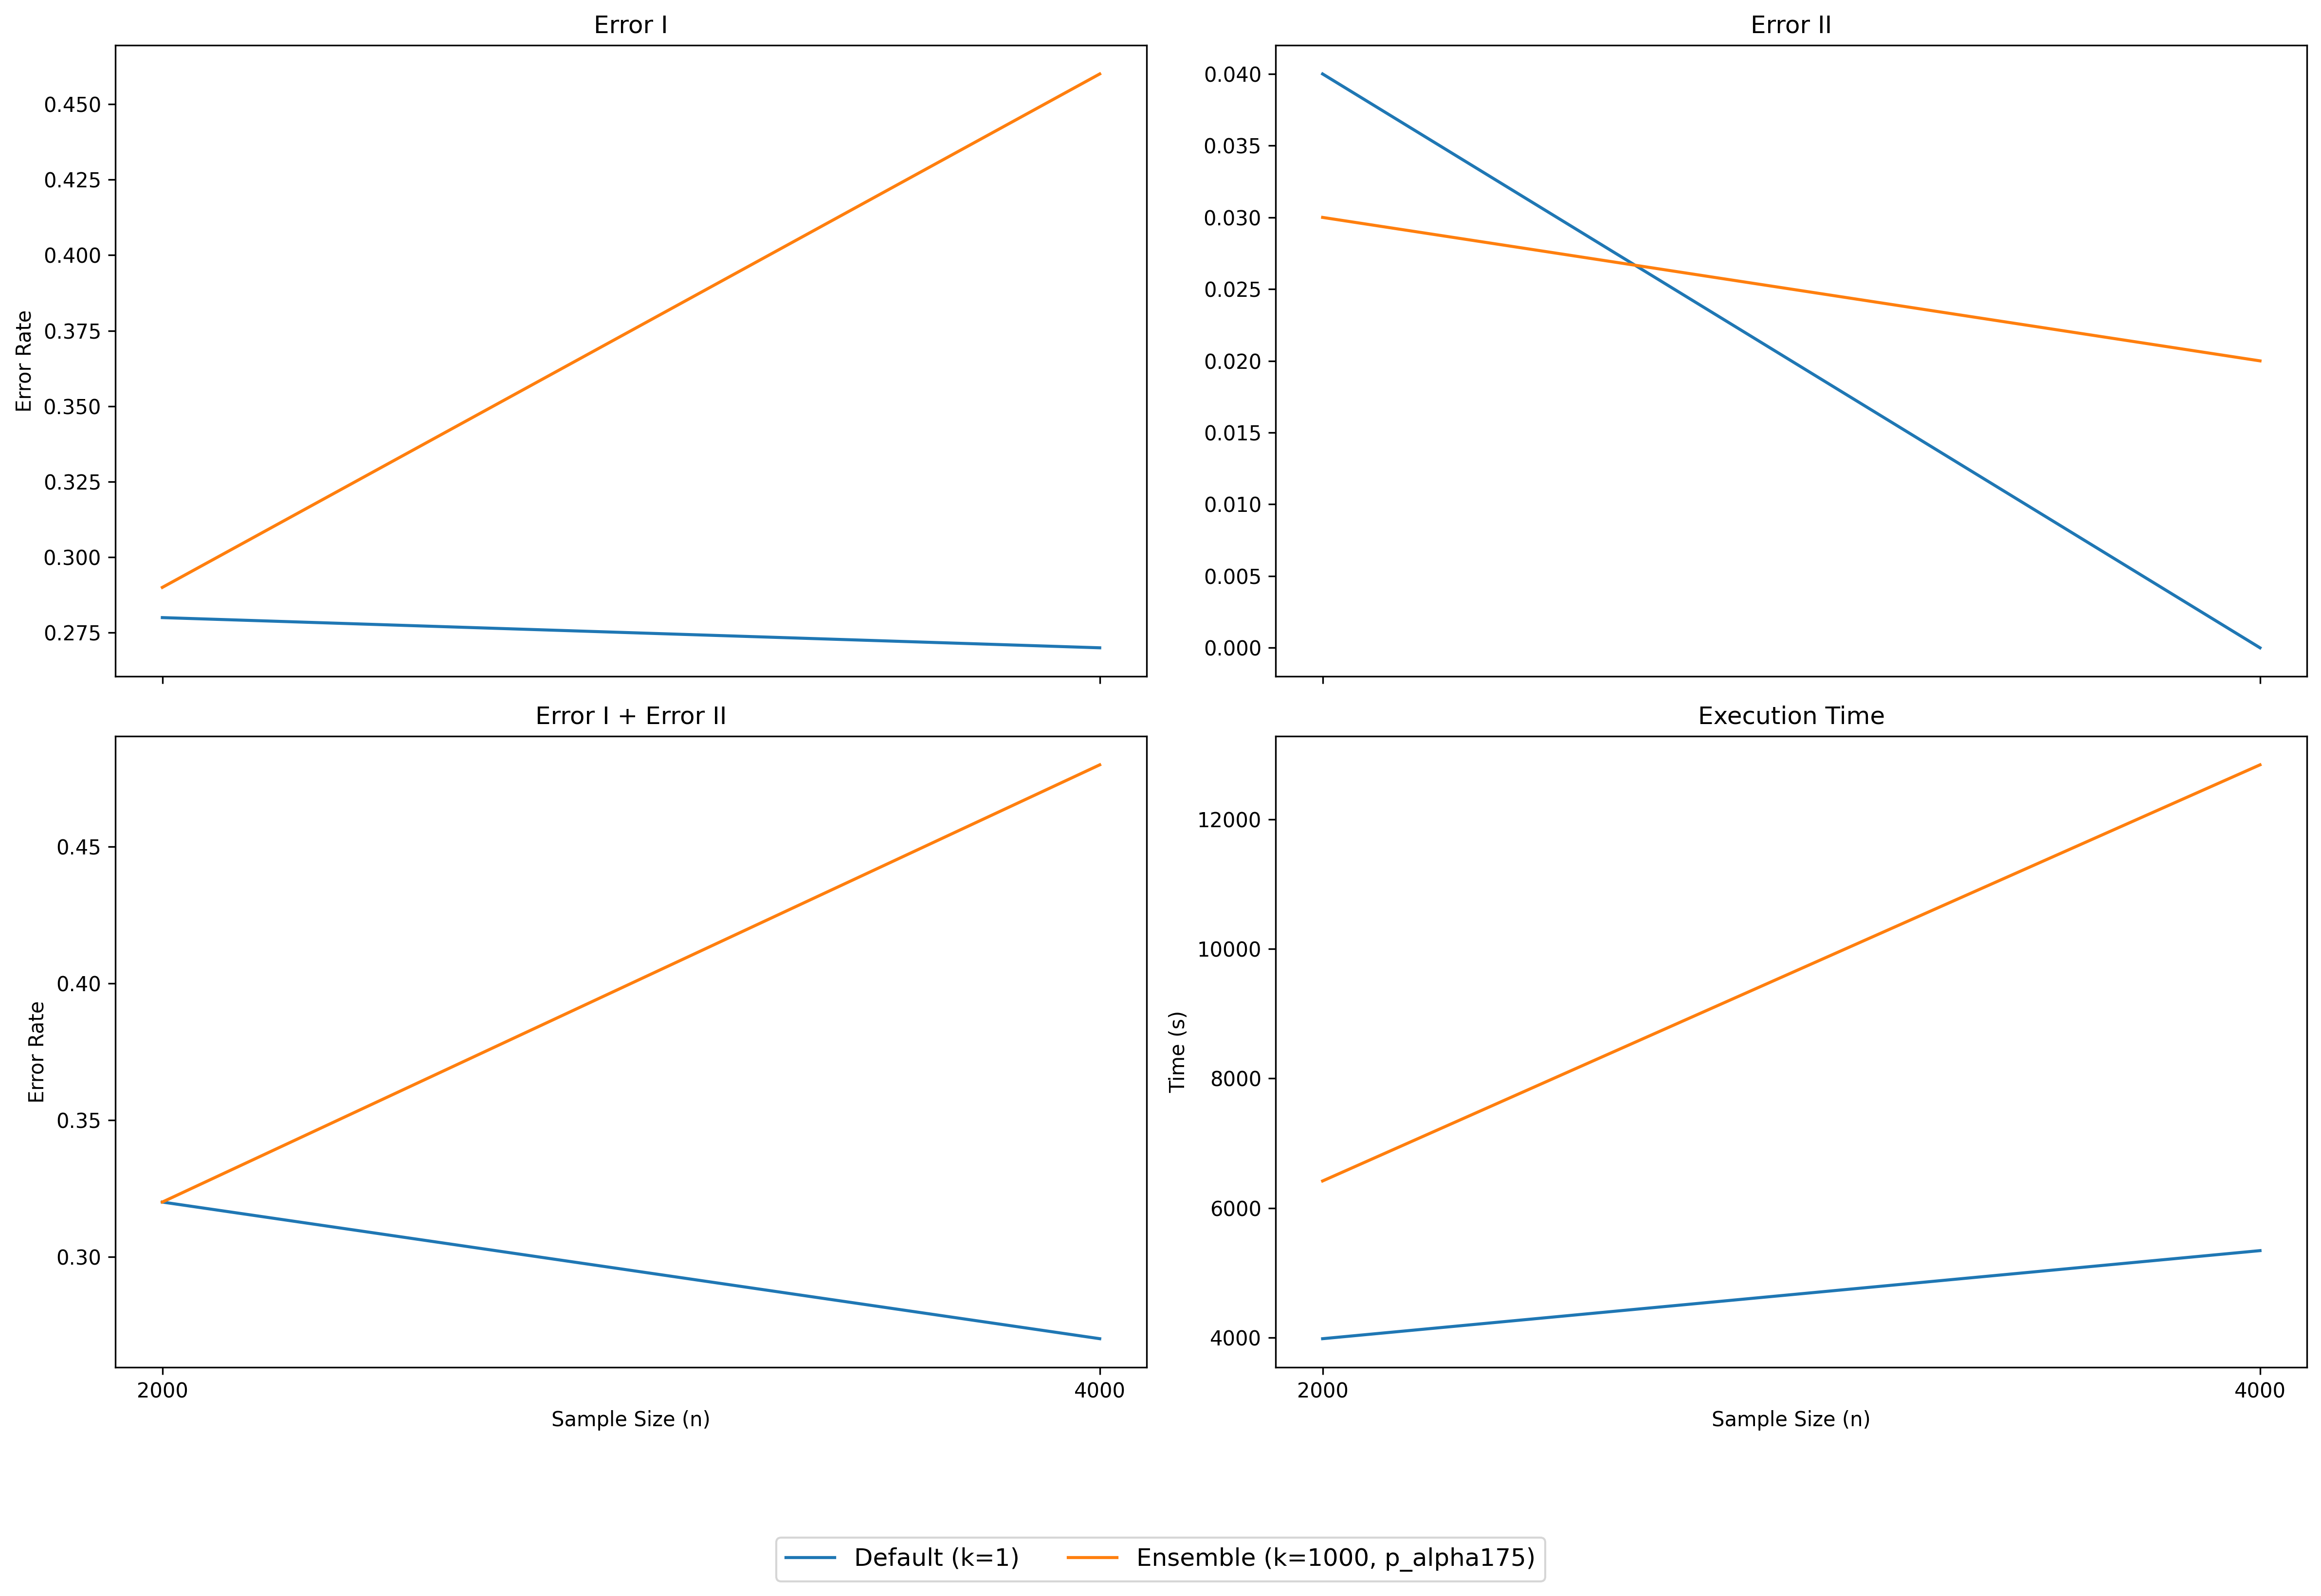

[[[0.28, 0.27], [0.04, 0.0], [3983.6910734176636, 5343.0395402908325]],
 [[0.29, 0.46], [0.03, 0.02], [6418.304899215698, 12841.390188455582]]]

In [13]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results